## Import libraries

In [1]:
# Import some required libraries. Some libraries will be imported later if needed.
import numpy as np 
import pandas as pd 
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import glob
import os

## load dataset

In [2]:
from sklearn.datasets import load_files
training_directory = r'C:/Users/polit/OneDrive/Desktop/fruits-360/Ours/Training'

def load_images(image_path):
    data = load_files(image_path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_train, y_train,target_labels = load_images(training_directory)


print('Successfully loaded !')
print('Number of training images : ' , x_train.shape[0])


Successfully loaded !
Number of training images :  396


In [3]:
train_categories = []
train_samples = []
for i in os.listdir(training_directory):
    train_categories.append(i)
    train_samples.append(len(os.listdir("../fruits-360/Ours/Training/"+ i)))
index = np.arange(len(target_labels))

In [4]:
# Check image classes
print (train_categories)

['Apple Golden', 'Apple Granny Smith', 'Apple Red', 'Avocado', 'Banana', 'Blueberry', 'Cocos', 'Grape pink', 'Grape White', 'Kiwi', 'Lemon', 'Mango', 'Melon Piel de Sapo', 'Orange', 'Papaya', 'Pineapple', 'Pomegranate', 'Strawberry', 'Watermelon']


In [5]:
# Chek number of images in each class
print('Number of images in each catagories ' ,train_samples)


Number of images in each catagories  [39, 24, 33, 12, 18, 45, 18, 18, 18, 27, 15, 16, 11, 32, 12, 12, 13, 17, 16]


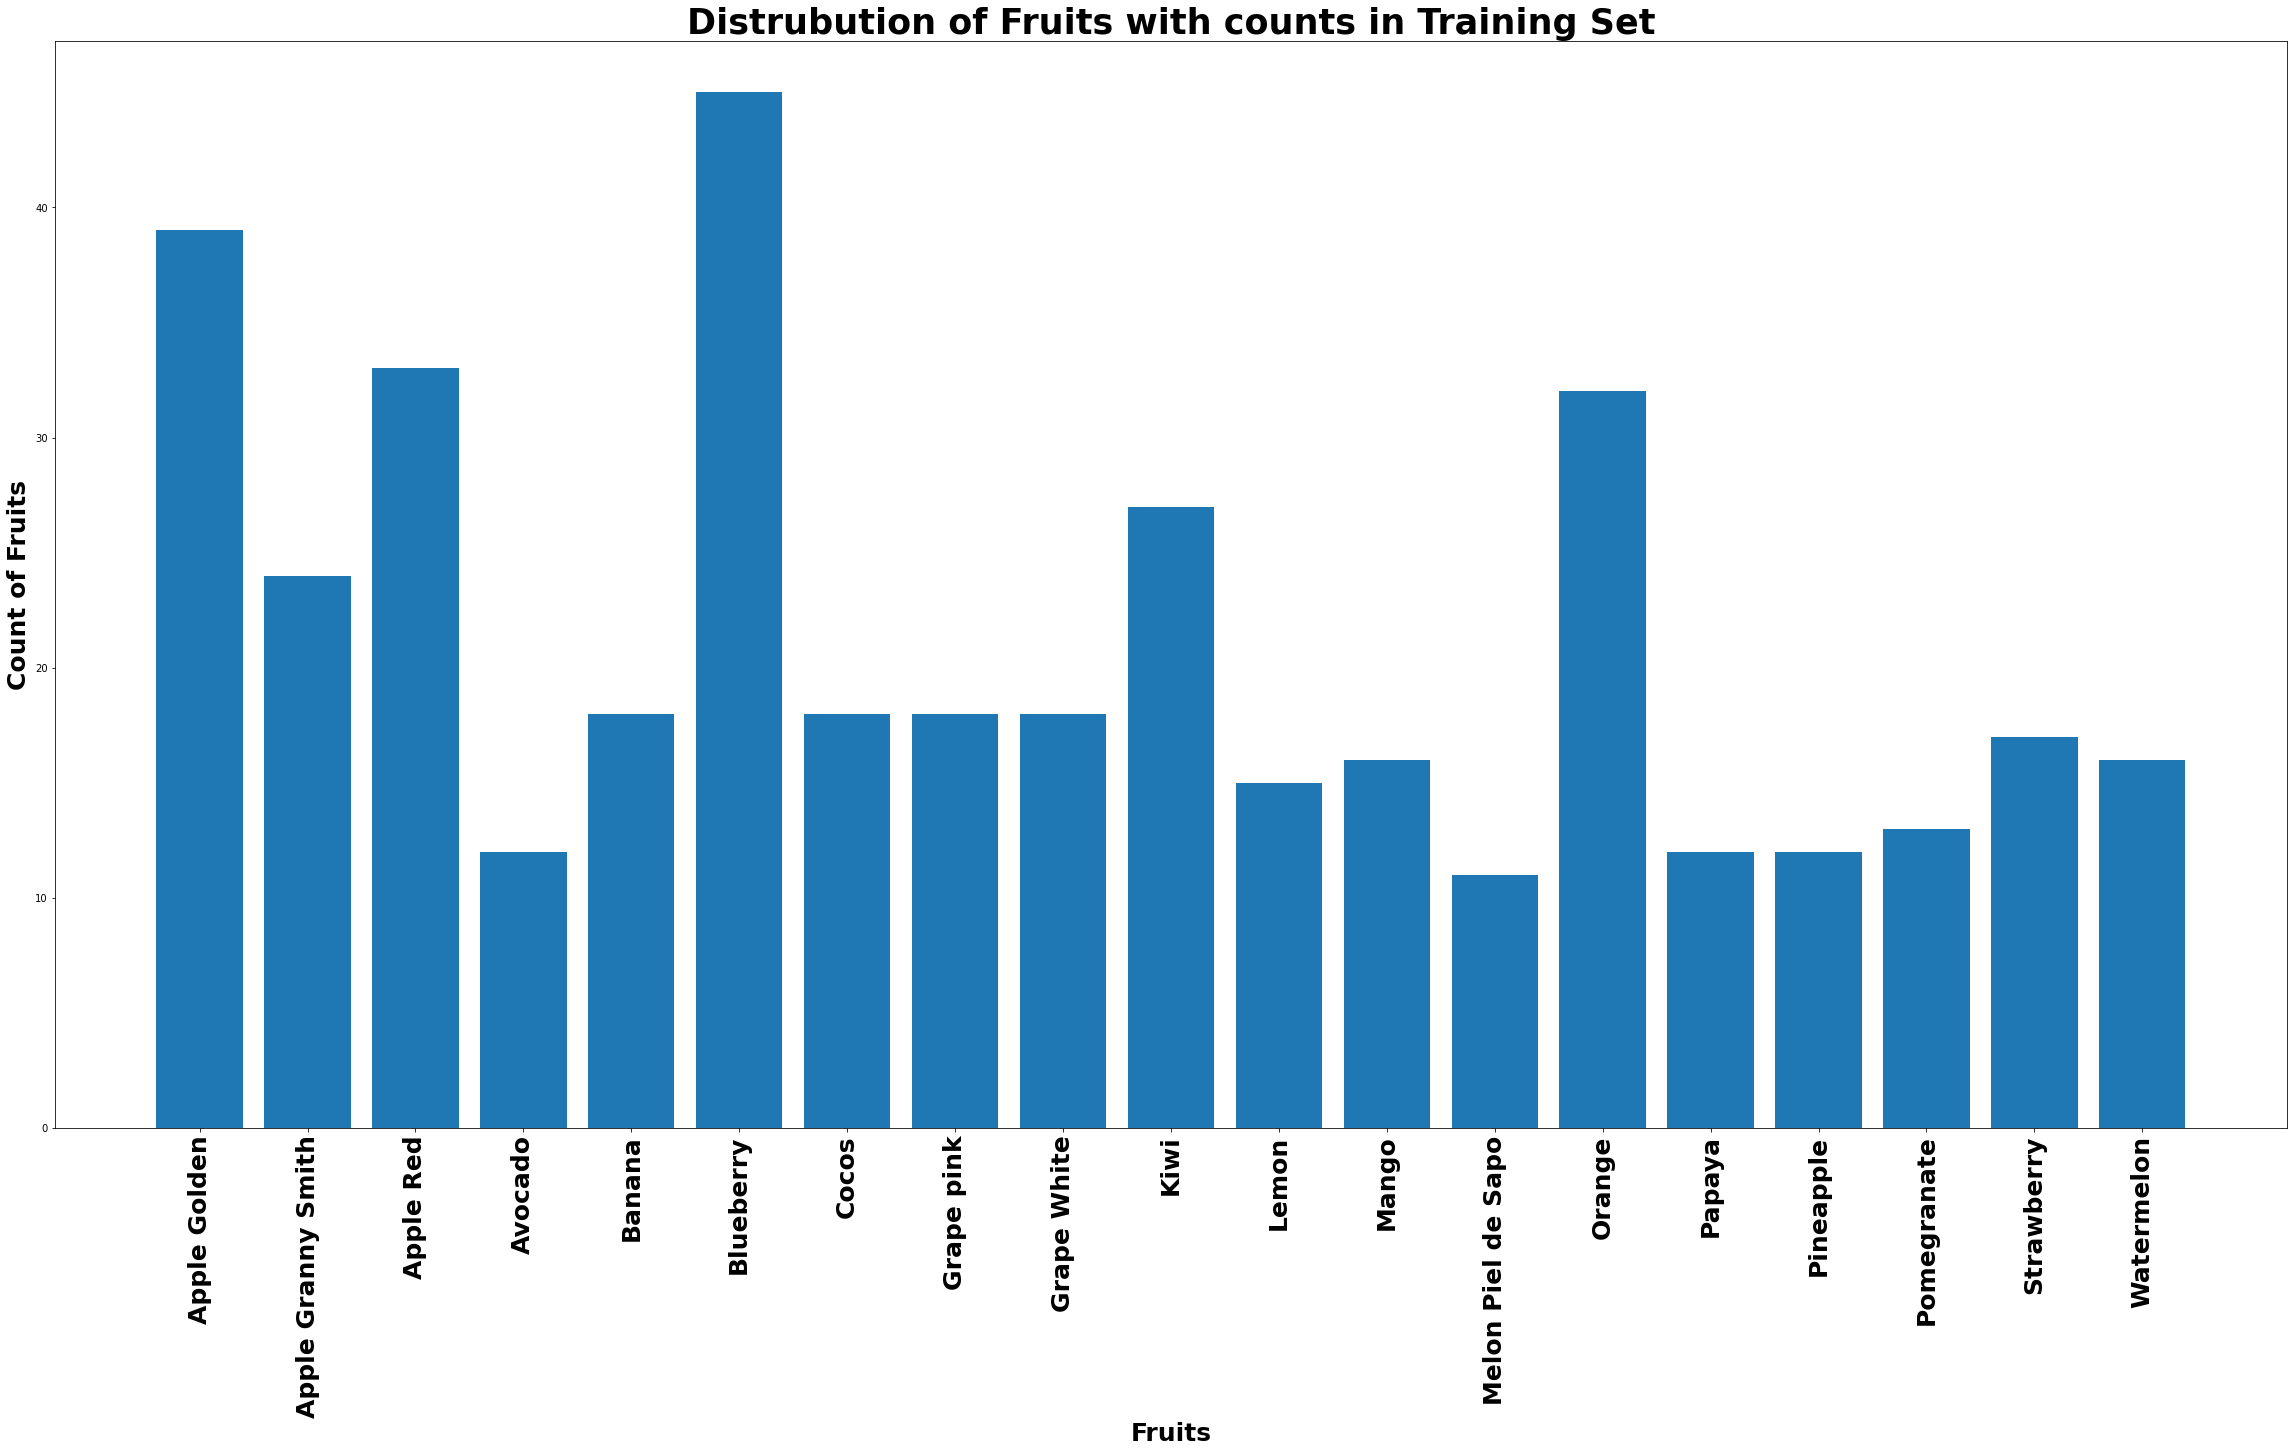

In [6]:
# Let us draw number of images in each catagories. 
figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 40
figure_size[1] = 20
plt.rcParams["figure.figsize"] = figure_size
index = np.arange(len(target_labels))
plt.bar(index, train_samples)
plt.xlabel('Fruits', fontsize=25, weight = 'bold')
plt.ylabel('Count of Fruits', fontsize=25, weight = 'bold')
plt.xticks(index, train_categories, fontsize=25, rotation=90, weight = 'bold')
plt.title('Distrubution of Fruits with counts in Training Set', fontsize=35, weight = 'bold')
plt.show()

In [7]:
# split dataset in to training and testing. 40 % will be on testing and 60 % will be on training.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.4, stratify=y_train)

## check no of classes

In [8]:
no_of_classes = len(np.unique(y_train))
no_of_classes

19

## Convert class vector (integers from 0 to nb_classes) to binary class matrix

In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test= np_utils.to_categorical(y_test,no_of_classes)

## number of training data

In [10]:
x_train.shape,y_train.shape

((237,), (237, 19))

## number of test data

In [11]:
x_test.shape,y_test.shape

((159,), (159, 19))

 ## convert images to numpy array

In [12]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_train = np.array(convert_image_to_array(x_train))
print('Shape of Training set: ',x_train.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Shape of Test set : ',x_test.shape)

print('Shape of one training image ',x_train[0].shape)

Shape of Training set:  (237, 100, 100, 3)
Shape of Test set :  (159, 100, 100, 3)
Shape of one training image  (100, 100, 3)


## Scale features  between 0.0 and 1.0.

In [13]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Import keras and define model

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout,Activation,BatchNormalization
from keras.optimizers import Adamax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras import backend as K
from tensorflow.keras.optimizers import Adadelta

model = Sequential()
model.add(Conv2D(filters = 16, strides=(1, 1),kernel_size = (5,5),input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(32, (5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(128, (5, 5), strides=(1, 1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='valid'))

model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      1216      
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        12832     
_________________________________________________________________
activation_1 (Activation)    (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        5

## Compile the model

In [15]:
learning_rate = 0.1  # initial learning rate
min_learning_rate = 0.00001  # once the learning rate reaches this value, do not decrease it further
learning_rate_reduction_factor = 0.5  # the factor used when reducing the learning rate -> learning_rate *= learning_rate_reduction_factor
patience = 3  # how many epochs to wait before reducing the learning rate when the loss plateaus
verbose = 1  # controls the amount of logging done during training and testing: 0 - none, 1 - reports metrics after each batch, 2 - reports metrics after each epoch

optimizer = Adadelta(lr=learning_rate)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', patience=patience, verbose=verbose, 
                                                factor=learning_rate_reduction_factor, min_lr=min_learning_rate)

learned_weights = ModelCheckpoint(filepath = 'C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_original.hdf5', verbose = 2, save_best_only = True)


history = model.fit(x_train,y_train,
        batch_size = 10,
        epochs=100,
        validation_split=0.2,           
        callbacks = [learning_rate_reduction,learned_weights],
        verbose=2, shuffle=True)

Epoch 1/100

Epoch 00001: val_loss improved from inf to 2.87254, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_original.hdf5
19/19 - 2s - loss: 2.9219 - accuracy: 0.0688 - val_loss: 2.8725 - val_accuracy: 0.2708
Epoch 2/100

Epoch 00002: val_loss improved from 2.87254 to 2.78550, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_original.hdf5
19/19 - 2s - loss: 2.7697 - accuracy: 0.1481 - val_loss: 2.7855 - val_accuracy: 0.1667
Epoch 3/100

Epoch 00003: val_loss improved from 2.78550 to 2.66191, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_original.hdf5
19/19 - 2s - loss: 2.6287 - accuracy: 0.1481 - val_loss: 2.6619 - val_accuracy: 0.2292
Epoch 4/100

Epoch 00004: val_loss improved from 2.66191 to 2.33905, saving model to C:/Users/polit/OneDrive/Desktop/fruits-360\fruits_360_original.hdf5
19/19 - 2s - loss: 2.3021 - accuracy: 0.3386 - val_loss: 2.3390 - val_accuracy: 0.2292
Epoch 5/100

Epoch 00005: val_loss did not i

Epoch 43/100

Epoch 00043: val_loss did not improve from 0.83816
19/19 - 2s - loss: 0.0684 - accuracy: 0.9894 - val_loss: 0.8979 - val_accuracy: 0.8542
Epoch 44/100

Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.0015625000232830644.

Epoch 00044: val_loss did not improve from 0.83816
19/19 - 2s - loss: 0.0569 - accuracy: 0.9841 - val_loss: 0.8936 - val_accuracy: 0.8542
Epoch 45/100

Epoch 00045: val_loss did not improve from 0.83816
19/19 - 2s - loss: 0.0899 - accuracy: 0.9841 - val_loss: 0.8996 - val_accuracy: 0.8542
Epoch 46/100

Epoch 00046: val_loss did not improve from 0.83816
19/19 - 3s - loss: 0.0862 - accuracy: 0.9788 - val_loss: 0.9071 - val_accuracy: 0.8542
Epoch 47/100

Epoch 00047: ReduceLROnPlateau reducing learning rate to 0.0007812500116415322.

Epoch 00047: val_loss did not improve from 0.83816
19/19 - 3s - loss: 0.0822 - accuracy: 0.9841 - val_loss: 0.9118 - val_accuracy: 0.8542
Epoch 48/100

Epoch 00048: val_loss did not improve from 0.83816
19/19 - 2s - 

Epoch 93/100

Epoch 00093: val_loss did not improve from 0.83816
19/19 - 3s - loss: 0.1055 - accuracy: 0.9577 - val_loss: 0.9071 - val_accuracy: 0.8542
Epoch 94/100

Epoch 00094: val_loss did not improve from 0.83816
19/19 - 4s - loss: 0.0768 - accuracy: 0.9788 - val_loss: 0.9071 - val_accuracy: 0.8542
Epoch 95/100

Epoch 00095: val_loss did not improve from 0.83816
19/19 - 4s - loss: 0.0883 - accuracy: 0.9788 - val_loss: 0.9071 - val_accuracy: 0.8542
Epoch 96/100

Epoch 00096: val_loss did not improve from 0.83816
19/19 - 3s - loss: 0.0704 - accuracy: 0.9841 - val_loss: 0.9071 - val_accuracy: 0.8542
Epoch 97/100

Epoch 00097: val_loss did not improve from 0.83816
19/19 - 4s - loss: 0.0777 - accuracy: 0.9841 - val_loss: 0.9070 - val_accuracy: 0.8542
Epoch 98/100

Epoch 00098: val_loss did not improve from 0.83816
19/19 - 5s - loss: 0.0649 - accuracy: 0.9841 - val_loss: 0.9070 - val_accuracy: 0.8542
Epoch 99/100

Epoch 00099: val_loss did not improve from 0.83816
19/19 - 5s - loss: 0.07

## Load the saved model

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
model = load_model('C:/Users/polit/OneDrive/Desktop/fruits-360/fruits_360_original.hdf5')

## Evaluate the model using test data. Test data was not used for training and validation

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

# score contains the metrics passed in the compile method. Here: loss, accuracy, and precision
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.583772599697113, 0.849056601524353]


## Import CSV file that contains nutrition values and predict the nutrition value of the fruit.

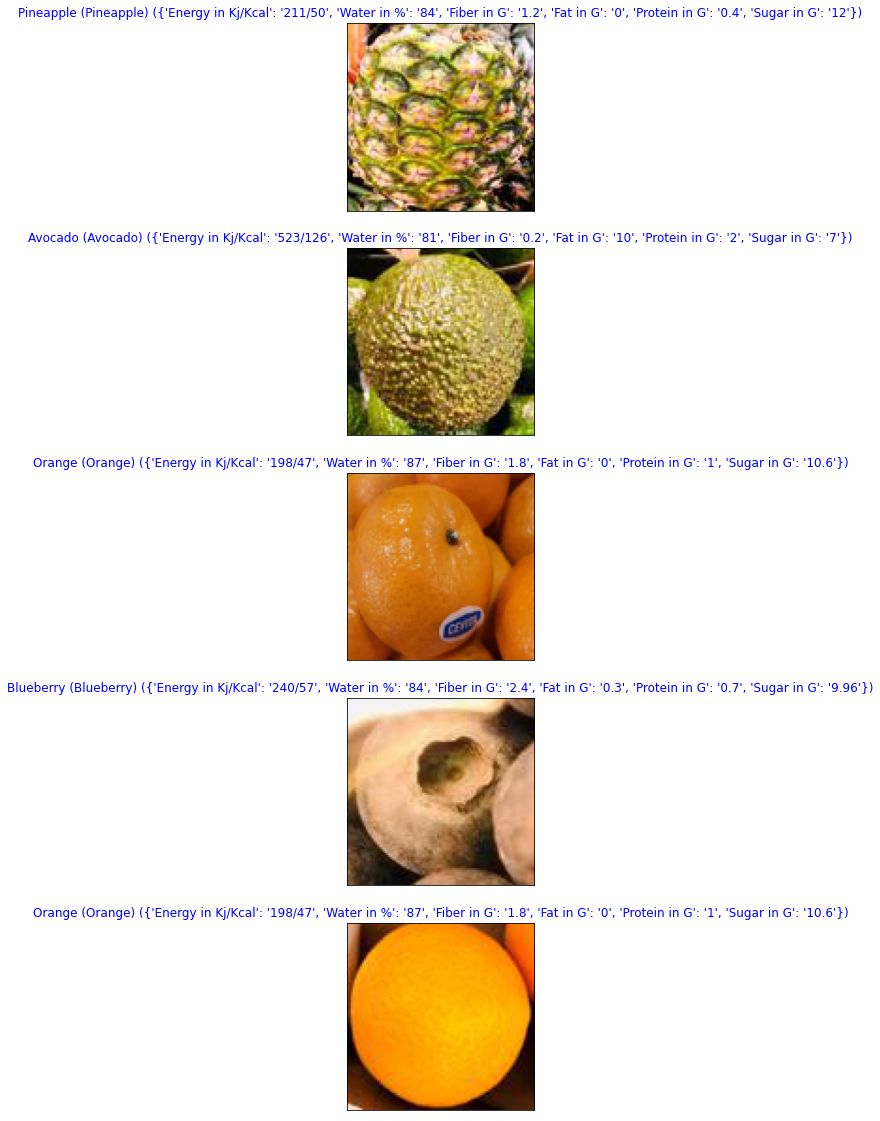

In [46]:
import csv
         
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=5, replace=False)):
    ax = fig.add_subplot(5, 1, i + 1, xticks=[], yticks=[])

    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    x = target_labels[pred_idx]
    with open("nutrition.csv") as f:
        reader = csv.reader(f)
        for row in reader:
            if x in row[0]:
                nutrition_value = (row)
    val = {}
    val["Energy in Kj/Kcal"] = nutrition_value[1]
    val["Water in %"] = nutrition_value[2]
    val["Fiber in G"] = nutrition_value[3]
    val["Fat in G"] = nutrition_value[4]
    val["Protein in G"] = nutrition_value[5]
    val["Sugar in G"] = nutrition_value[6]
            
    if target_labels[pred_idx] != target_labels[true_idx]:
        val = "Prediction not correct"
    
    ax.set_title("{} ({}) ({})".format(target_labels[pred_idx], target_labels[true_idx] ,val ),
                 color=("blue" if pred_idx == true_idx else "red"))
    
    


## Let us plot training accuaracy vs validation accuracy

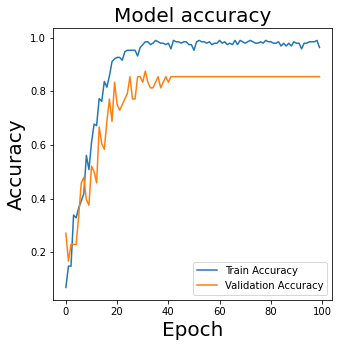

In [47]:
import matplotlib.pyplot as plt 
#plt.figure(1)  
fig = plt.figure(figsize=(5,5))   
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title('Model accuracy',fontsize=20)  
plt.ylabel('Accuracy',fontsize=20)  
plt.xlabel('Epoch',fontsize=20) 
plt.legend()
plt.show()


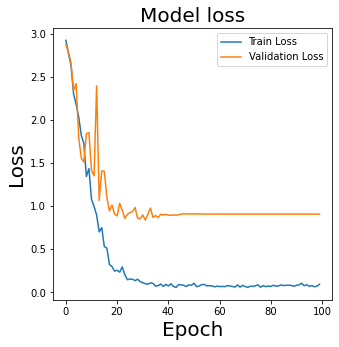

In [48]:
#plt.subplot(212)  
fig = plt.figure(figsize=(5,5)) 
plt.plot(history.history['loss'],label = "Train Loss")  
plt.plot(history.history['val_loss'],label = "Validation Loss")  
plt.title('Model loss',fontsize=20)  
plt.ylabel('Loss',fontsize=20)  
plt.xlabel('Epoch',fontsize=20)   
plt.legend()
plt.show()

## Check how many images are classified correctly 

In [49]:
import numpy as np

prob = model.predict(x_test)
pred = np.argmax(prob, axis = 1)
label = np.argmax(y_test,axis = 1) 

correct_indices = np.flatnonzero(pred == label) 
incorrect_indices = np.flatnonzero(pred != label) 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")


135  classified correctly
24  classified incorrectly


## Let us plot the confusion matrix.

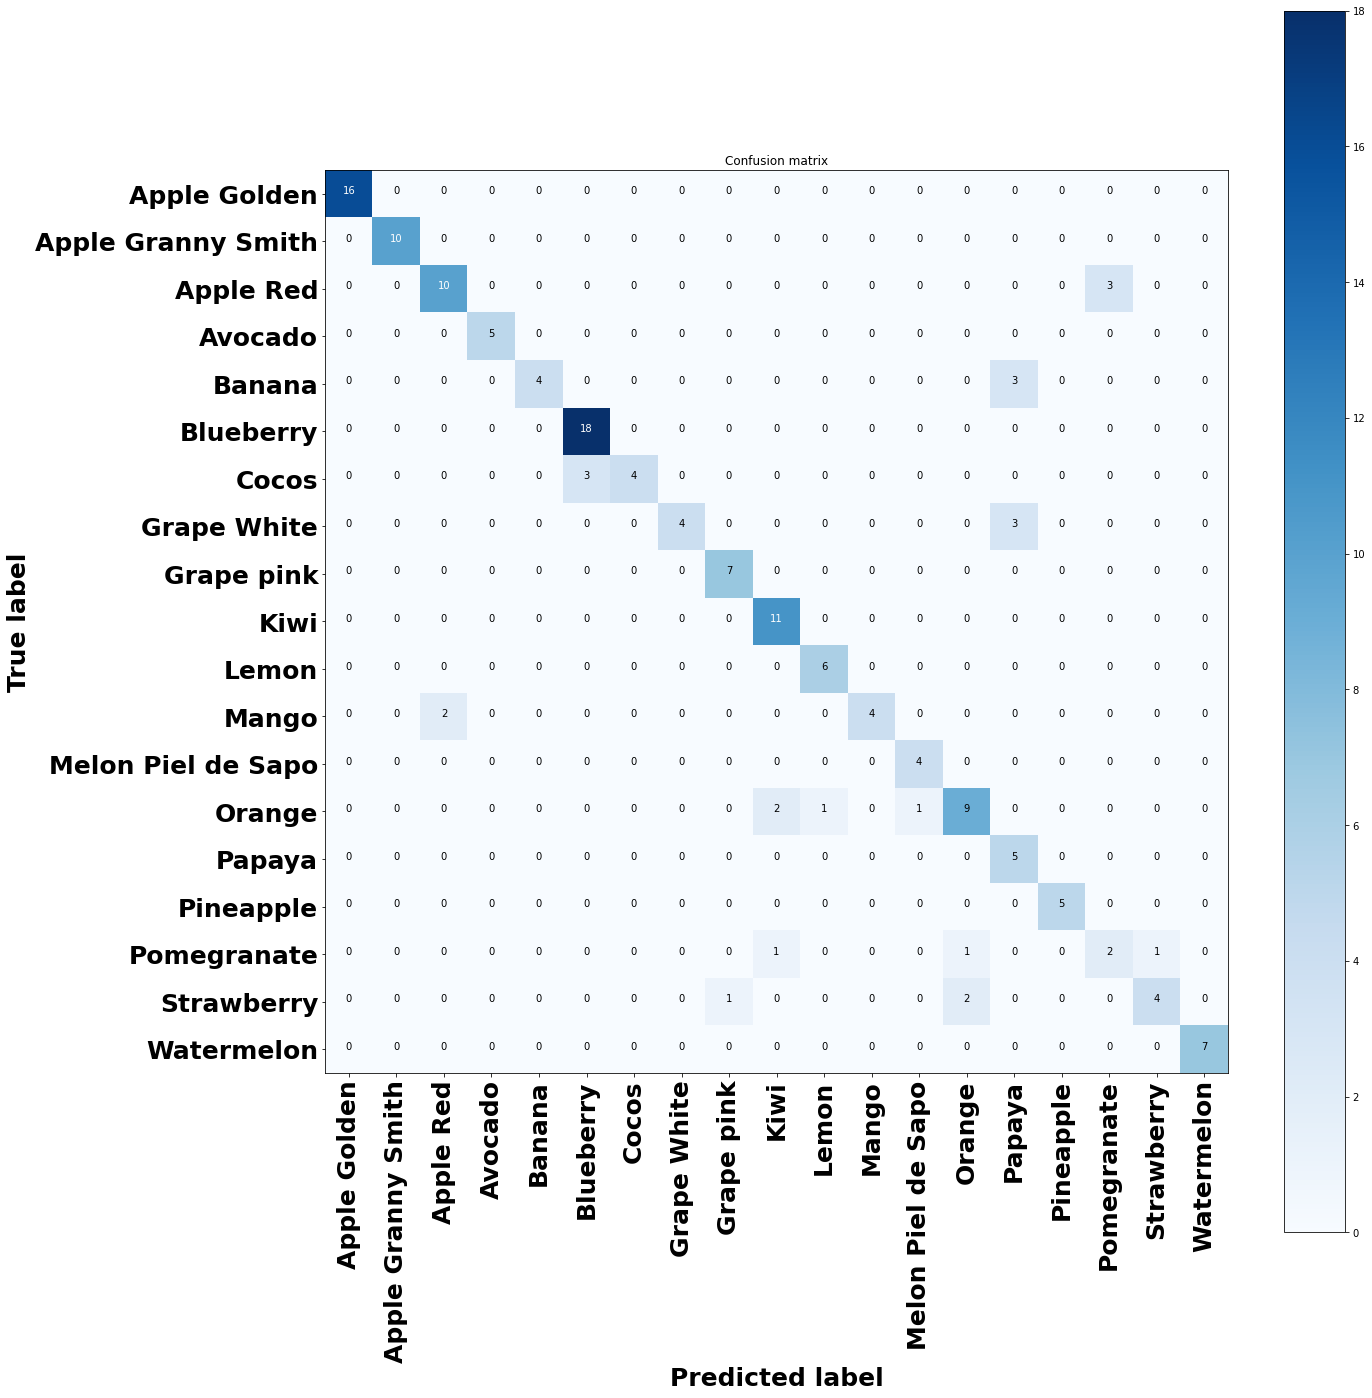

In [50]:


import itertools
fig = plt.figure(figsize=(20, 20))
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,rotation=90, fontsize=25, weight = 'bold')
    plt.yticks(tick_marks, classes,fontsize=25, weight = 'bold')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=25, weight = 'bold')
    plt.xlabel('Predicted label',fontsize=25, weight = 'bold')

conf_mat = tf.math.confusion_matrix(labels=label, predictions=pred).numpy()
plot_confusion_matrix(conf_mat, target_labels)

# Plot the images that are classified incorrectly

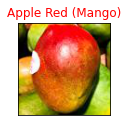

In [56]:
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(20, 20))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=10, replace=False)):
    #ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    
    if target_labels[pred_idx] != target_labels[true_idx]:
        ax = fig.add_subplot(10, 1, i + 1, xticks=[], yticks=[])
        
        ax.imshow(np.squeeze(x_test[idx]))
    
        
        #x = target_labels[pred_idx]
        ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx] ),
                 color=("red"))
   
    
    
